In [17]:
import numpy as np
import pandas as pd

![DELL](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Dell_logo_2016.svg/240px-Dell_logo_2016.svg.png) ![DELL ](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/RR1-_Dell_Campus.jpg/640px-RR1-_Dell_Campus.jpg)
# Stock Analysis of DELL Stock  

# 1. Import Libraries

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [19]:
DE_Data = pd.read_csv('DELL_stock_history.csv',sep='\t')

In [20]:
DE_Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [21]:
DE_Data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-08-17 00:00:00-04:00,11.636467,11.770219,11.502714,11.502714,271519,0,0.0
1,2016-08-18 00:00:00-04:00,11.770218,11.770218,11.368961,11.435837,1767366,0,0.0
2,2016-08-19 00:00:00-04:00,11.422462,11.636466,11.409087,11.636466,4735900,0,0.0
3,2016-08-22 00:00:00-04:00,11.502714,12.198227,11.395712,11.676593,2245909,0,0.0
4,2016-08-23 00:00:00-04:00,11.703343,12.278478,11.636466,12.037724,1483020,0,0.0


# 3. Basic EDA

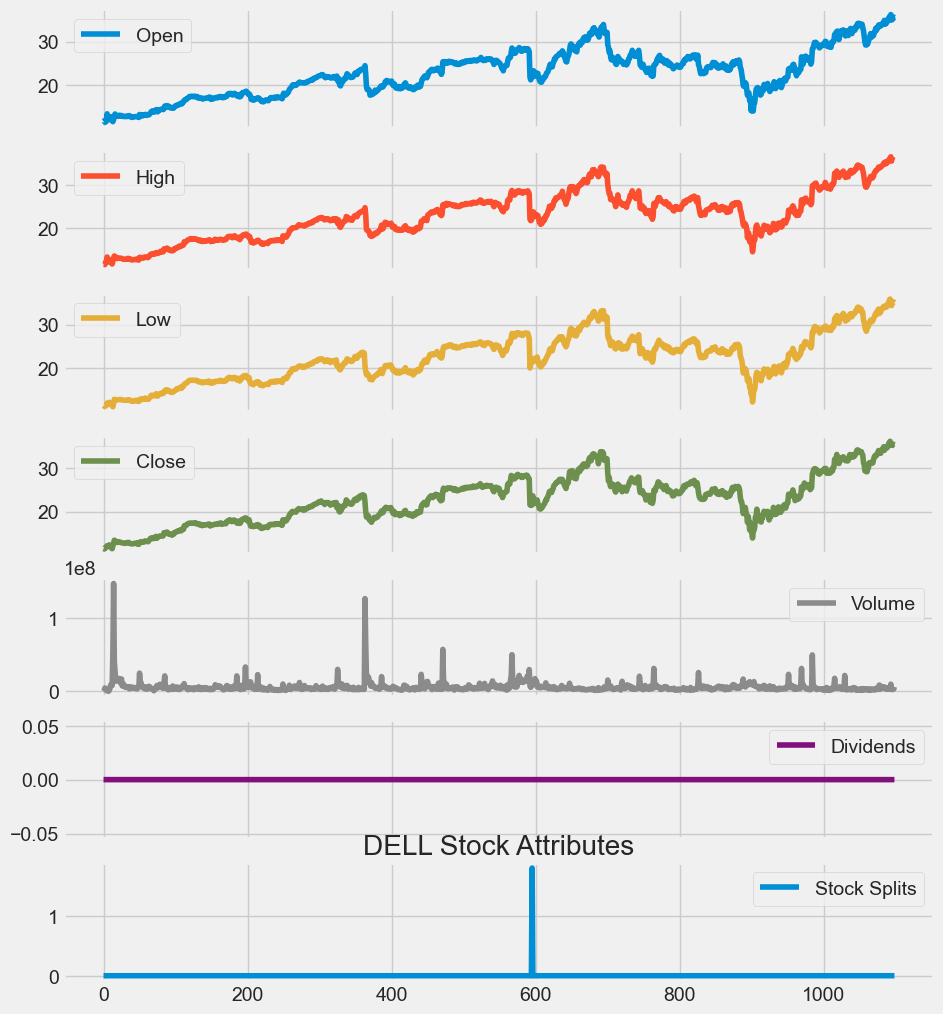

In [22]:
DE_Data.plot(subplots = True, figsize = (10,12))
plt.title('DELL Stock Attributes')
plt.show()

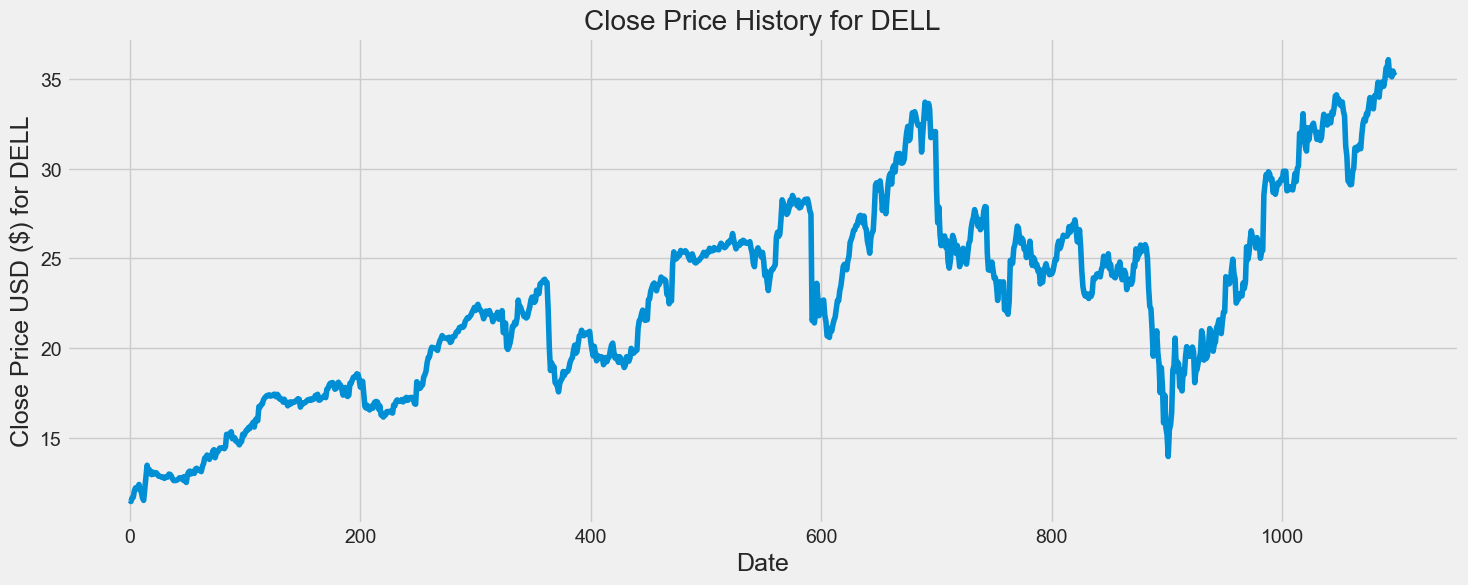

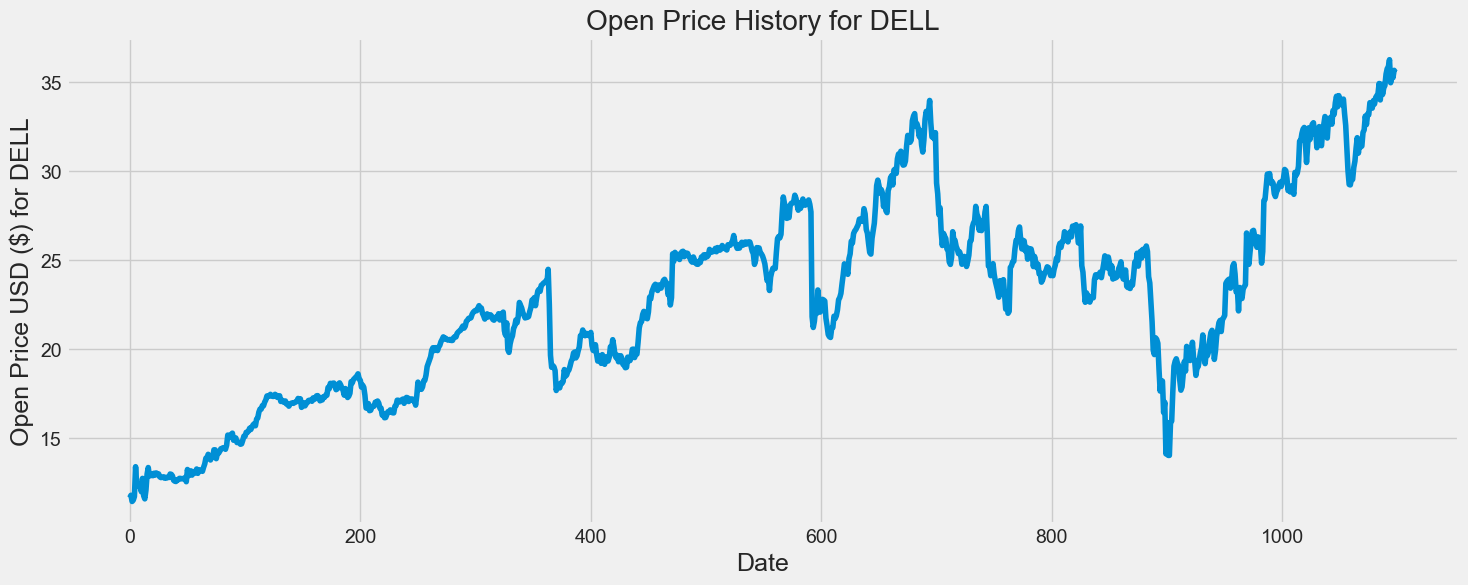

In [23]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

plot_close_val(DE_Data, 'Close', 'DELL')
plot_close_val(DE_Data, 'Open',  'DELL')

<Axes: >

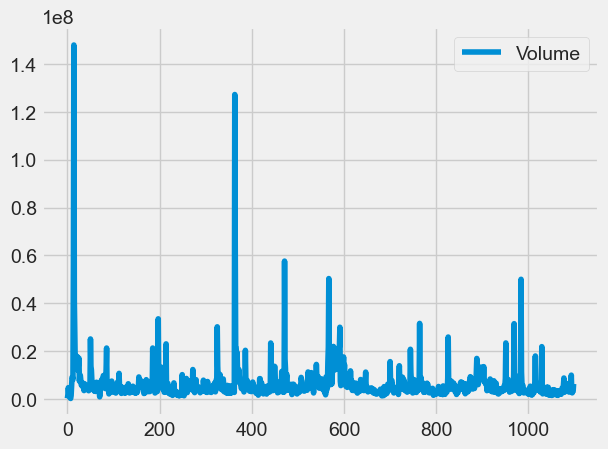

In [24]:
DE_Data[["Volume"]].plot()

# 4. Basic Company Info

In [25]:

DE_info =  pd.read_csv('DELL_stock_info.csv', 
                       header=None,
                       sep='\t', 
                       names=(['Description','Information']))
DE_info.dropna()
DE_info.drop(DE_info.loc[DE_info['Information']=='nan'].index, inplace=True)
DE_info.dropna()
ko = DE_info.head(50)
ko = ko.sort_values('Information').style
ko

,Description,Information
46,ask,0
45,bid,0
34,dividendYield,0.0218
36,payoutRatio,0.5385
37,beta,0.899
33,dividendRate,1.48
19,shareHolderRightsRisk,10
47,bidSize,1000
14,fullTimeEmployees,133000
21,governanceEpochDate,1696118400


# 5. Basic CAGR

## 5.1 Basic Rolling Averages

In [26]:
# Isolate the adjusted closing prices 
adj_close_px = DE_Data['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

1089    32.546663
1090    32.597873
1091    32.651740
1092    32.710680
1093    32.760683
1094    32.819622
1095    32.916124
1096    33.034849
1097    33.183286
1098    33.332206
Name: Close, dtype: float64

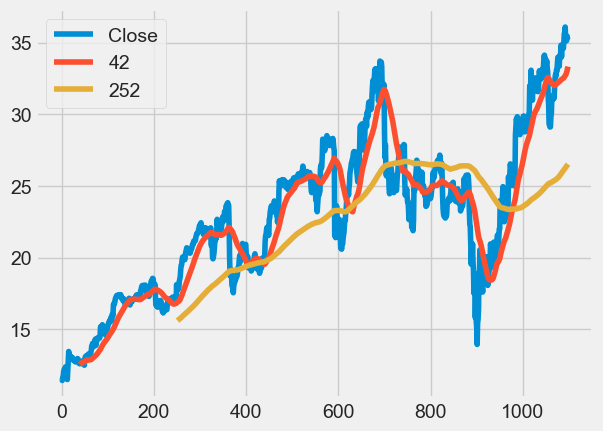

In [27]:
# Short moving window rolling mean
DE_Data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
DE_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
DE_Data[['Close', '42', '252']].plot()

plt.show()

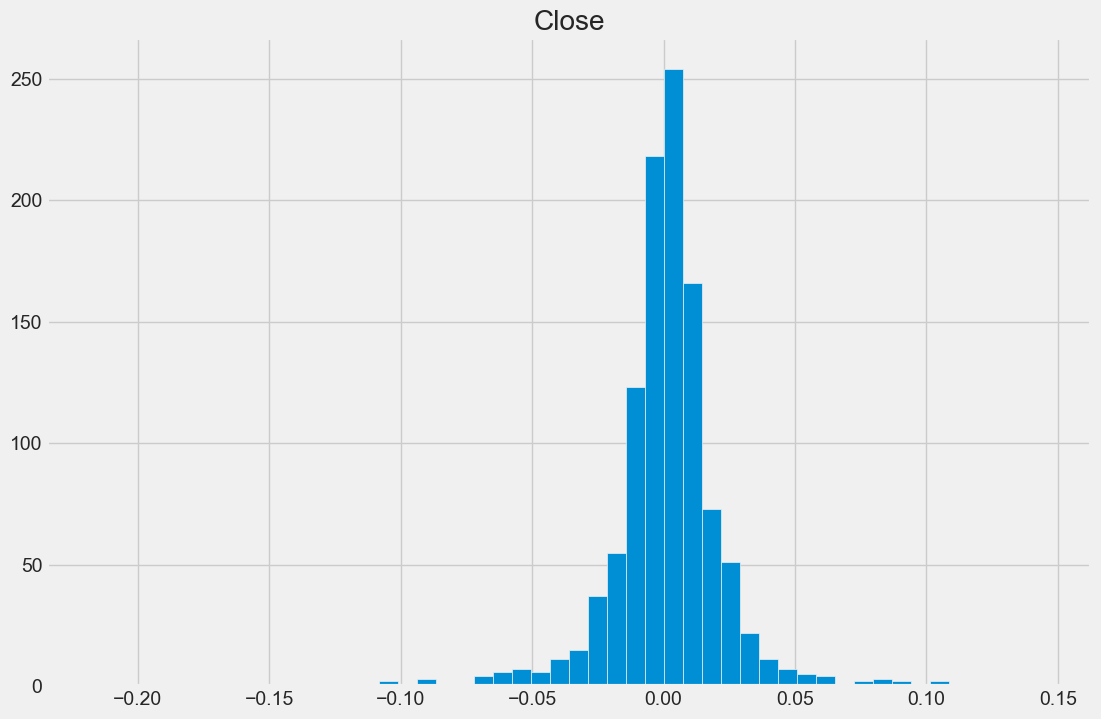

In [28]:
daily_close_px = DE_Data[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

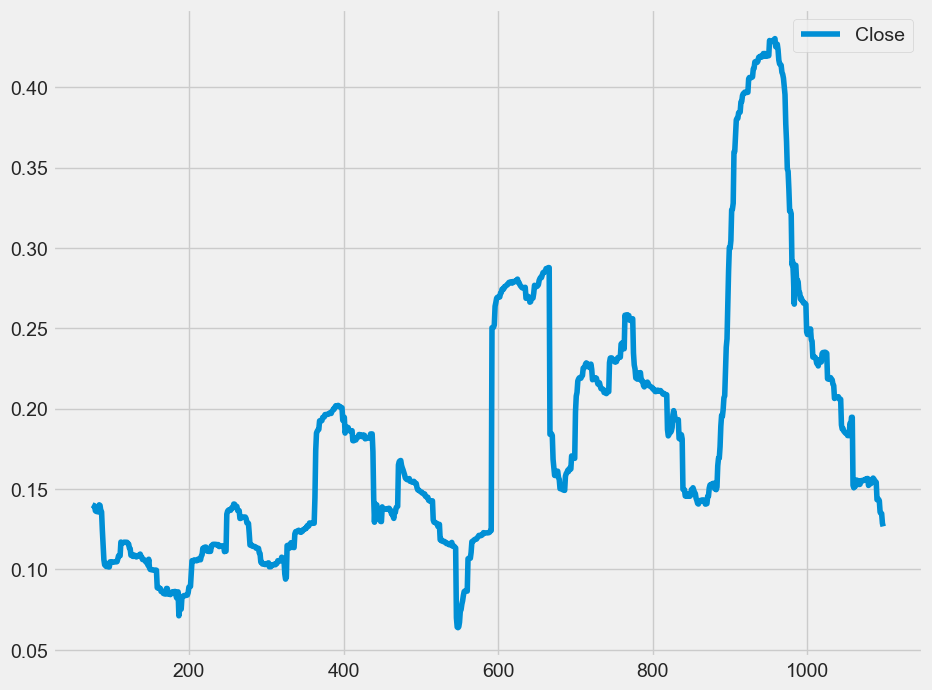

In [29]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

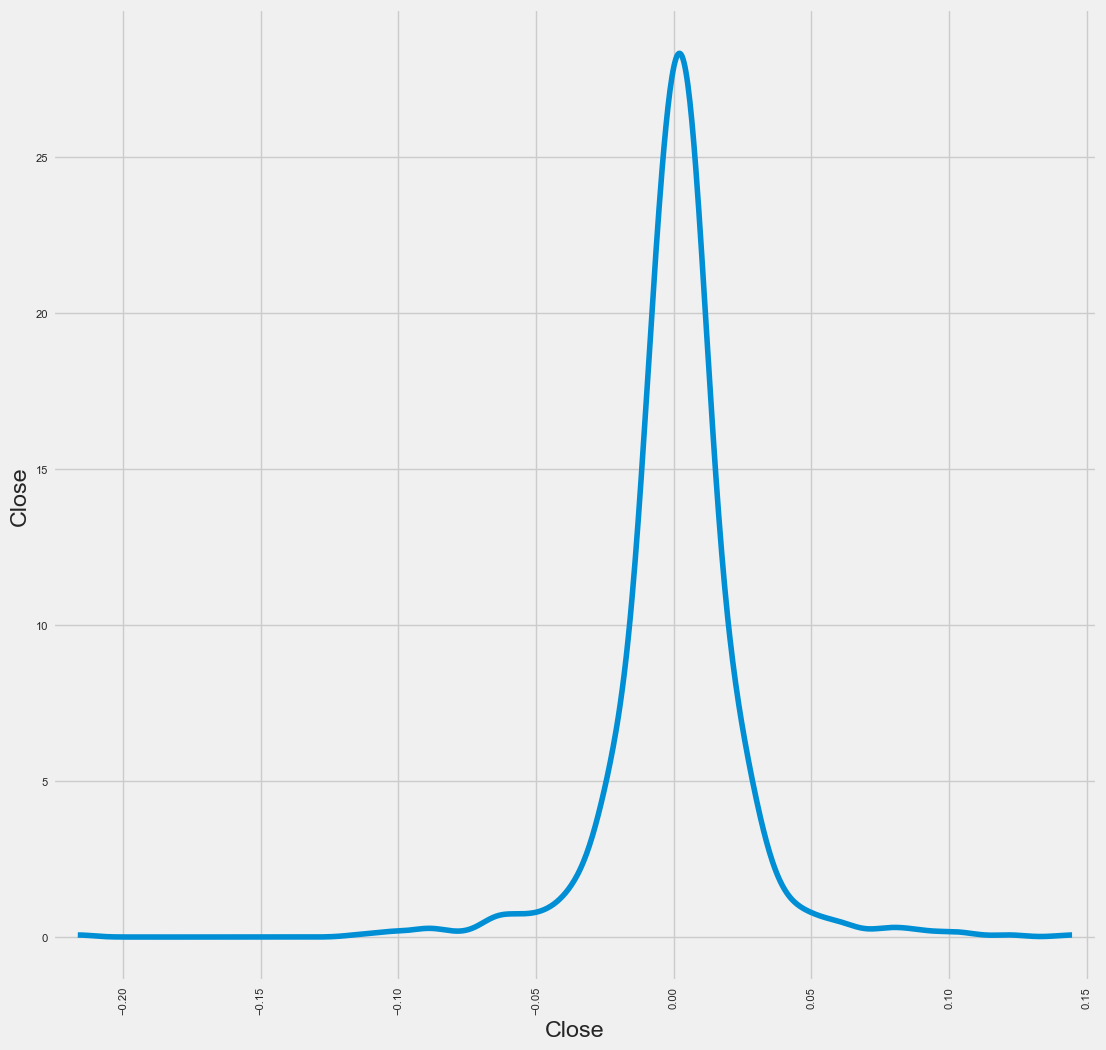

In [30]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

# 5.2 Basic MACD

In [31]:
import plotly.graph_objects as go

#DE_Data=DE_Data.reset_index()

fig = go.Figure(data=go.Ohlc(x=DE_Data['Date'],
        open=DE_Data['Open'],
        high=DE_Data['High'],
        low=DE_Data['Low'],
        close=DE_Data['Close']))
fig.show()

## 5.2.1 Basic SMA

In [32]:
#DE_Data=DE_Data.reset_index()

DE_Data['SMA5'] = DE_Data.Close.rolling(5).mean()
DE_Data['SMA20'] = DE_Data.Close.rolling(20).mean()
DE_Data['SMA50'] = DE_Data.Close.rolling(50).mean()
DE_Data['SMA200'] = DE_Data.Close.rolling(200).mean()
DE_Data['SMA500'] = DE_Data.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=DE_Data['Date'],open=DE_Data['Open'],high=DE_Data['High'],low=DE_Data['Low'],close=DE_Data['Close'], name = "OHLC"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

## 5.2.2 Basic EMA

In [33]:
DE_Data['EMA5'] = DE_Data.Close.ewm(span=5, adjust=False).mean()
DE_Data['EMA20'] = DE_Data.Close.ewm(span=20, adjust=False).mean()
DE_Data['EMA50'] = DE_Data.Close.ewm(span=50, adjust=False).mean()
DE_Data['EMA200'] = DE_Data.Close.ewm(span=200, adjust=False).mean()
DE_Data['EMA500'] = DE_Data.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=DE_Data['Date'],
                              open=DE_Data['Open'],
                              high=DE_Data['High'],
                              low=DE_Data['Low'],
                              close=DE_Data['Close'], name = "OHLC"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=DE_Data.Date, y=DE_Data.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [34]:
DE_Data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,42,252,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500
0,2016-08-17 00:00:00-04:00,11.636467,11.770219,11.502714,11.502714,271519,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.502714,11.502714,11.502714,11.502714,11.502714
1,2016-08-18 00:00:00-04:00,11.770218,11.770218,11.368961,11.435837,1767366,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.480422,11.496345,11.500092,11.502049,11.502447
2,2016-08-19 00:00:00-04:00,11.422462,11.636466,11.409087,11.636466,4735900,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.532436,11.509690,11.505440,11.503386,11.502982
3,2016-08-22 00:00:00-04:00,11.502714,12.198227,11.395712,11.676593,2245909,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.580489,11.525585,11.512151,11.505110,11.503675
4,2016-08-23 00:00:00-04:00,11.703343,12.278478,11.636466,12.037724,1483020,0,0.0,NaN,NaN,11.657867,NaN,NaN,NaN,NaN,11.732901,11.574360,11.532762,11.510409,11.505807


# 6 FINTA Tech Analysis Ratios

## Let us do a financial ratios calculation using FINTA library
* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'

In [36]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover

In [37]:
fin_ma = pd.read_csv('DELL_stock_history.csv',  
                    parse_dates=True,
                    sep='\t')
print(fin_ma.head())
ohlc=fin_ma
print(TA.SMA(ohlc, 42))
#ohlc.index = ohlc[index].dt.date

                        Date       Open       High        Low      Close  \
0  2016-08-17 00:00:00-04:00  11.636467  11.770219  11.502714  11.502714   
1  2016-08-18 00:00:00-04:00  11.770218  11.770218  11.368961  11.435837   
2  2016-08-19 00:00:00-04:00  11.422462  11.636466  11.409087  11.636466   
3  2016-08-22 00:00:00-04:00  11.502714  12.198227  11.395712  11.676593   
4  2016-08-23 00:00:00-04:00  11.703343  12.278478  11.636466  12.037724   

    Volume  Dividends  Stock Splits  
0   271519          0           0.0  
1  1767366          0           0.0  
2  4735900          0           0.0  
3  2245909          0           0.0  
4  1483020          0           0.0  
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1094    32.832195
1095    32.877631
1096    32.937675
1097    33.032572
1098    33.139317
Name: 42 period SMA, Length: 1099, dtype: float64


TA.SMA(ohlc).plot(title=' Simple Moving Average for DELL Stock')
TA.SMM(ohlc).plot(title=' Simple Moving Median for DELL Stock')
TA.SSMA(ohlc).plot(title=' Smoothed Simple Moving Average for DELL Stock')
TA.EMA(ohlc).plot(title=' Exponential Moving Average for DELL Stock')
TA.DEMA(ohlc).plot(title=' Double Exponential Moving Average for DELL Stock')
TA.TEMA(ohlc).plot(title=' Triple Exponential Moving Average for DELL Stock')
TA.TRIMA(ohlc).plot(title=' Triangular Moving Average for DELL Stock')
TA.TRIX(ohlc).plot(title=' Triple Exponential Moving Average Oscillator for DELL Stock')
TA.VAMA(ohlc).plot(title=' Volume Adjusted Moving Average for DELL Stock')
TA.ER(ohlc).plot(title=' Kaufman Efficiency Indicator for DELL Stock')
TA.WMA(ohlc).plot(title=' Weighted Moving Average for DELL Stock')
TA.HMA(ohlc).plot(title=' Hull Moving Average for DELL Stock')
TA.VWAP(ohlc).plot(title=' Volume Weighted Average Price for DELL Stock')
TA.SMMA(ohlc).plot(title=' Smoothed Moving Average for DELL 

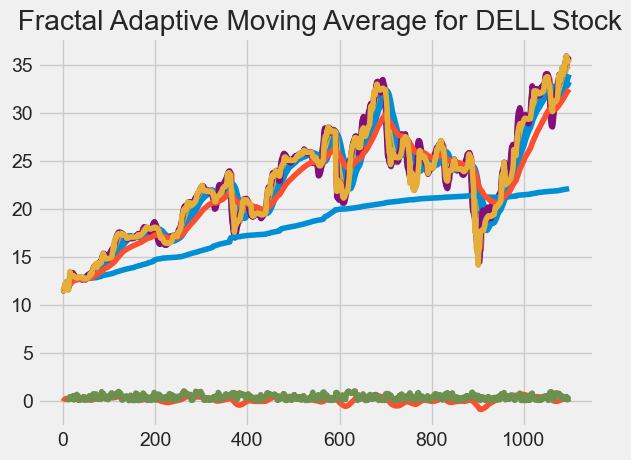

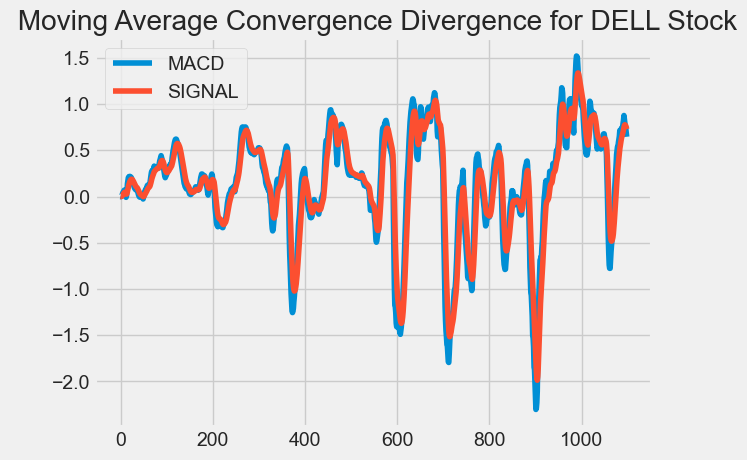

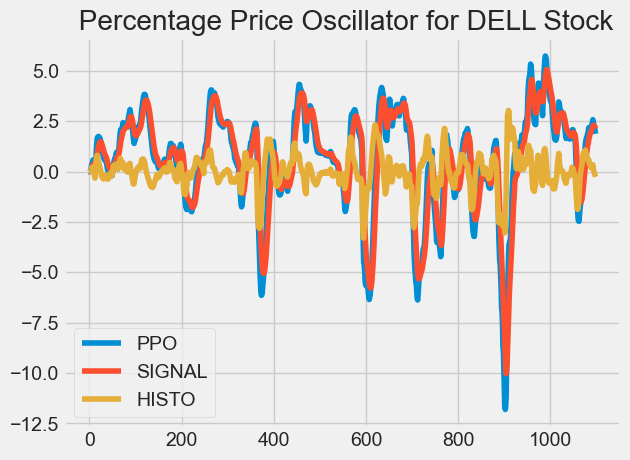

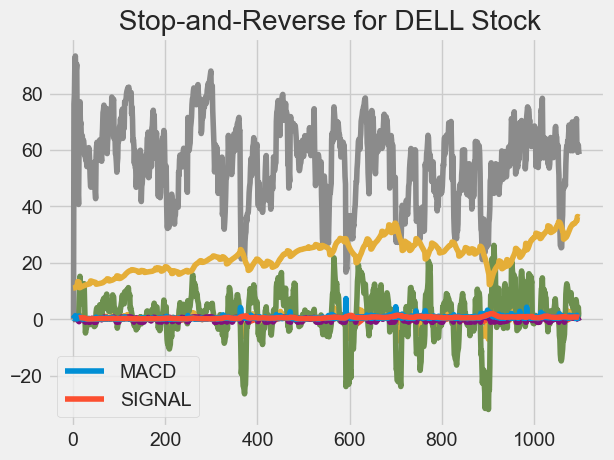

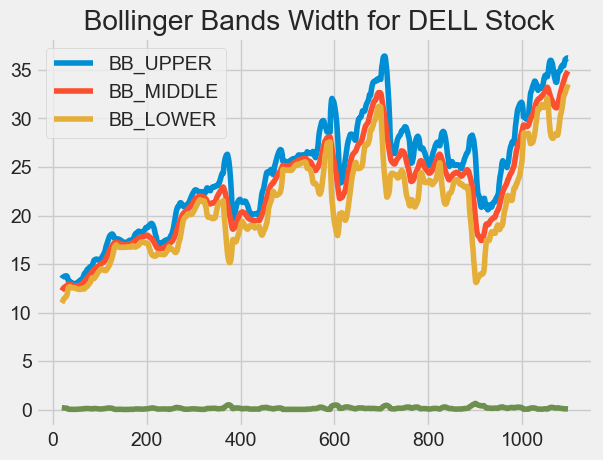

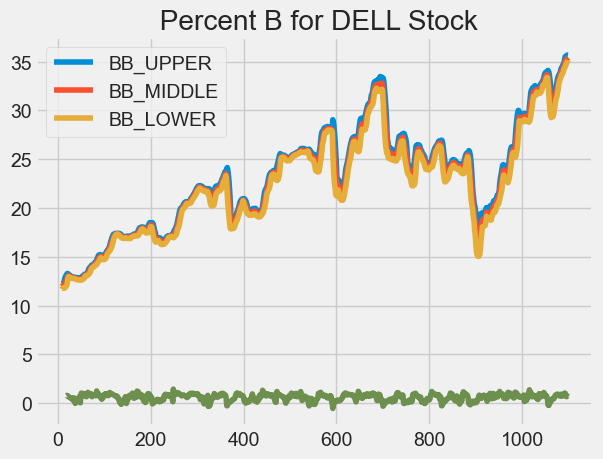

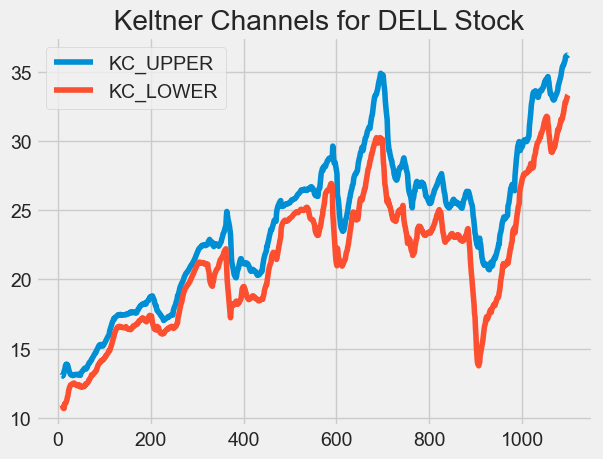

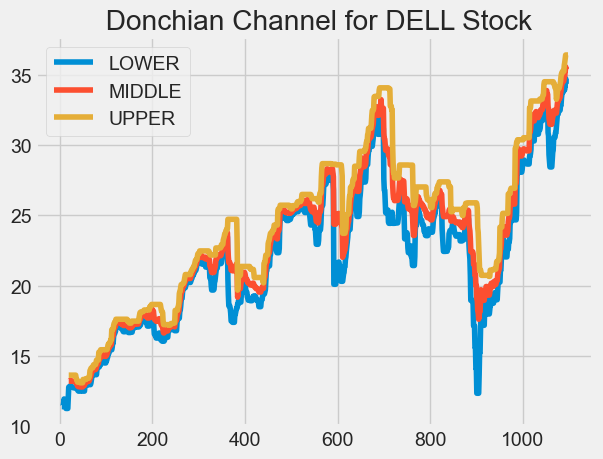

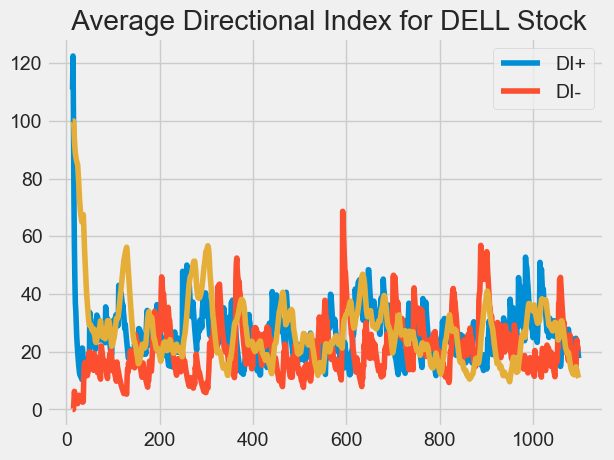

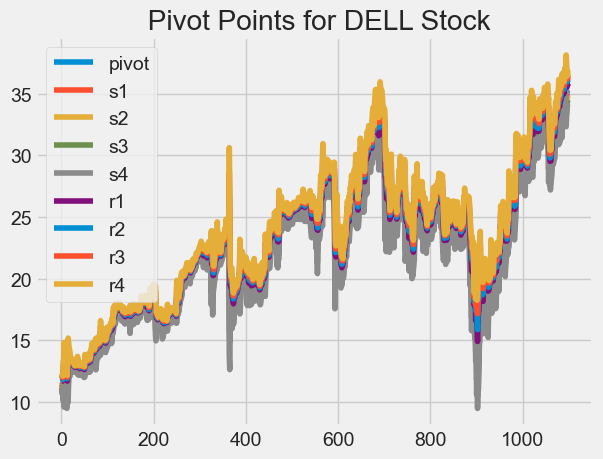

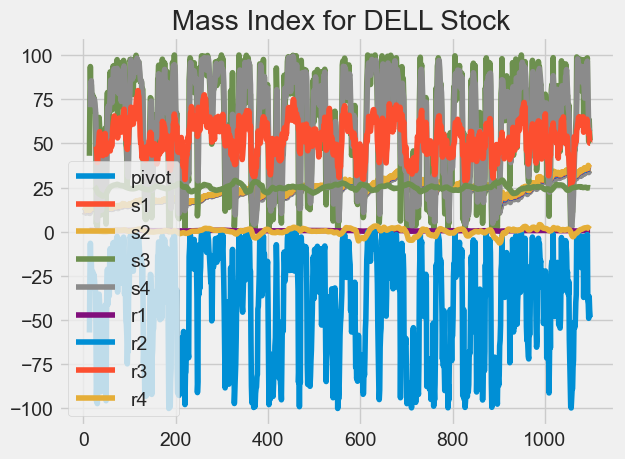

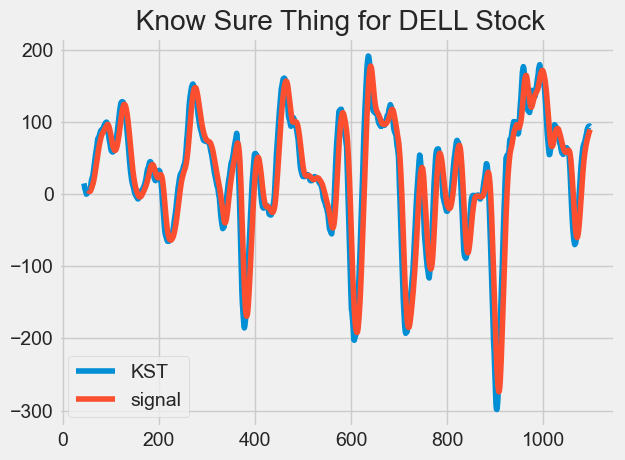

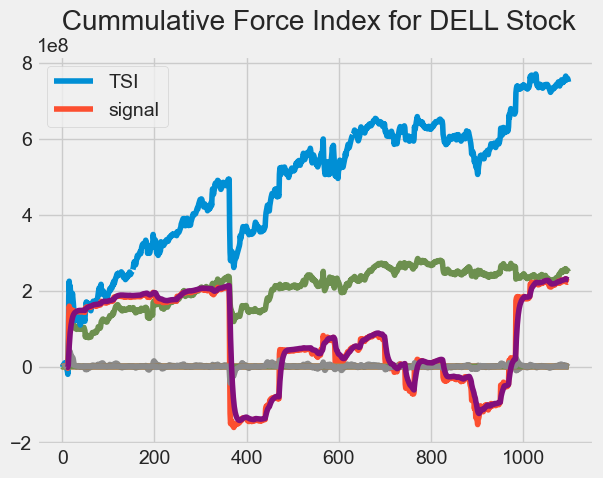

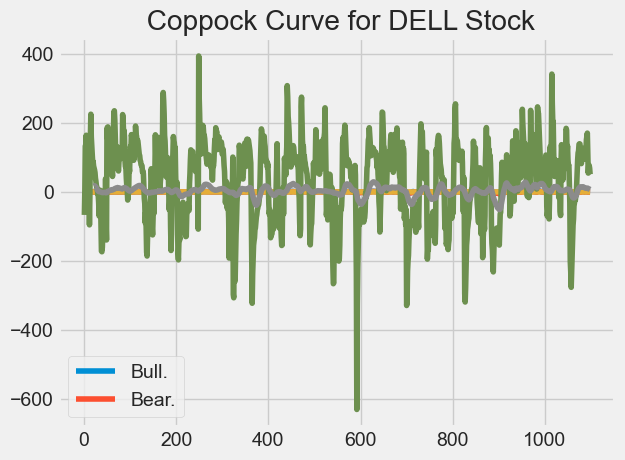

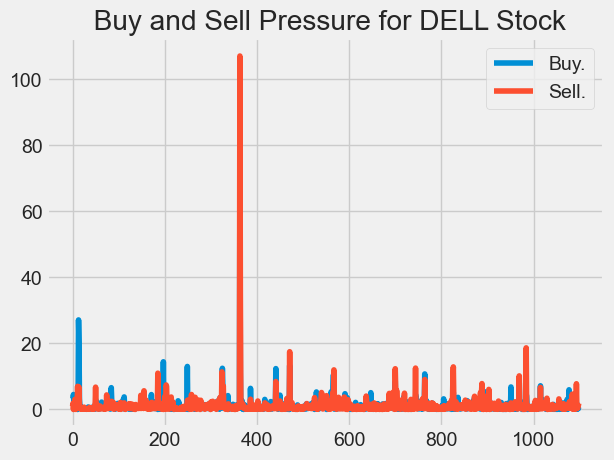

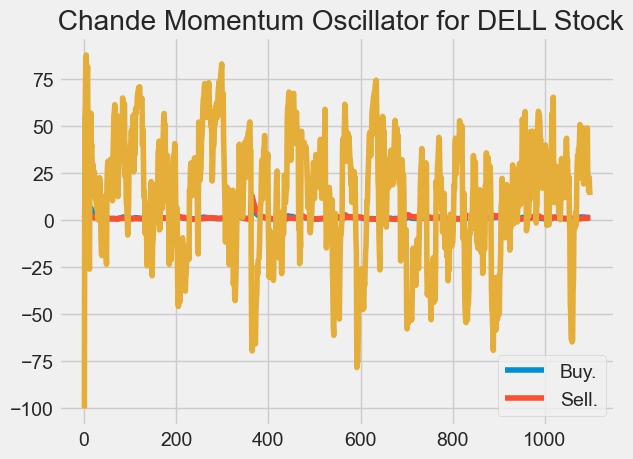

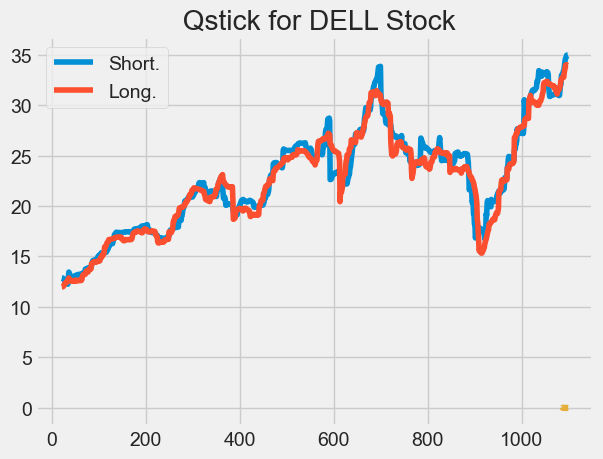

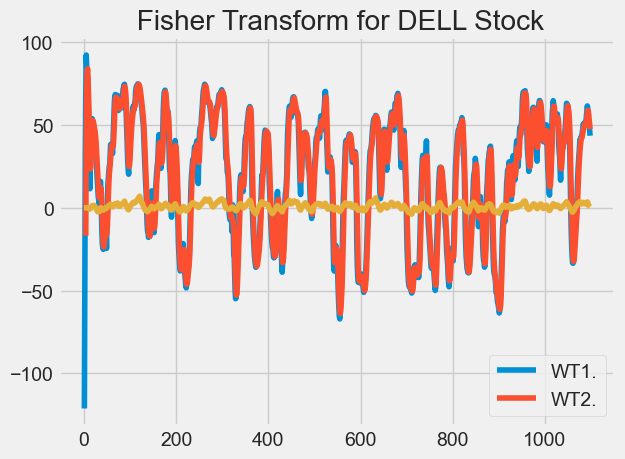

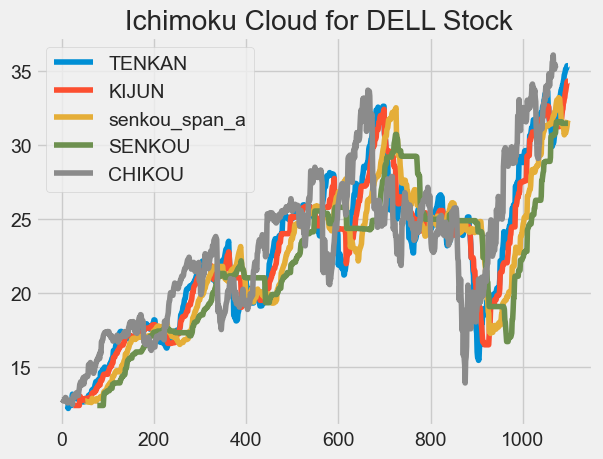

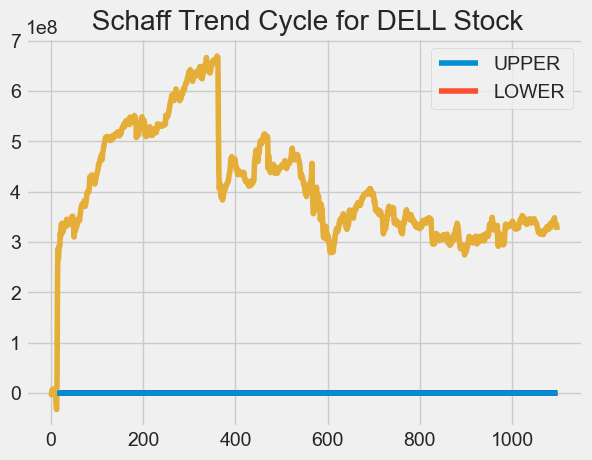

In [38]:
function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 #' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 #' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 #' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 #' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 #' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}


for key, value in function_dict .items():
    function_name = "TA." + value + "(ohlc).plot(title='" + key + "for DELL Stock')"
    print(function_name)
    result = eval(function_name)

# 7 Back Testing Trading Strategy

In [39]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

## Let us do a bit of backtesting with a value of $100000 

In [40]:
ohlc.head()
print(ohlc.Date)


0       2016-08-17 00:00:00-04:00
1       2016-08-18 00:00:00-04:00
2       2016-08-19 00:00:00-04:00
3       2016-08-22 00:00:00-04:00
4       2016-08-23 00:00:00-04:00
                  ...            
1094    2020-12-21 00:00:00-05:00
1095    2020-12-22 00:00:00-05:00
1096    2020-12-23 00:00:00-05:00
1097    2020-12-24 00:00:00-05:00
1098    2020-12-28 00:00:00-05:00
Name: Date, Length: 1099, dtype: object


In [41]:
bt = Backtest(ohlc, DemaCross,
              cash=100000, commission=0.015, exclusive_orders=True)

## Back Testing Summary

In [42]:
bt.run()

Start                                     0.0
End                                    1098.0
Duration                               1098.0
Exposure Time [%]                   99.727025
Equity Final [$]                138613.499666
Equity Peak [$]                 216477.587817
Return [%]                            38.6135
Buy & Hold Return [%]              205.969969
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -44.815067
Avg. Drawdown [%]                   -6.553492
Max. Drawdown Duration                  464.0
Avg. Drawdown Duration              40.653846
# Trades                                 70.0
Win Rate [%]                        41.428571
Best Trade [%]                      21.775996
Worst Trade [%]                    -11.764008
Avg. Trade [%]                    

### As you can see, if you had invested `$100,000` in DELL shares, you would have got by now a return of  `38%`! with a peak value of `$216,477`

In [43]:
data=ohlc

In [44]:
bt.plot()


GridPlot(id='p1285', ...)

In [45]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

In [46]:


def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
#data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
#data['X_day'] = data.index.dayofweek
#data['X_hour'] = data.index.hour

#data = data.apply(pd.to_numeric)
#data = data.dropna().astype(np.float64)
#data.fillna(method="ffill")
#data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data.replace([np.inf, -np.inf], 0.0, inplace=True)
#data = data.fillna(data.mean(), inplace=True)
#data = data.dropna().astype(np.float64)


In [47]:


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

In [48]:
%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(ohlc, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

  0%|          | 0/9 [00:00<?, ?it/s]

CPU times: total: 6.86 s
Wall time: 6.96 s


In [49]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10         7905.640963
     80   15       10         8509.273618
     100  15       10         6099.841286
30   40   20       15        12202.575497
          25       15        13608.193468
                                 ...     
100  200  15       10        14486.695361
          20       10        18712.021582
                   15        17451.870418
          25       10        16426.654966
          30       10        13717.196190
Name: Equity Final [$], Length: 177, dtype: float64

In [50]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,40,60,80,100,120,140,160,180,200
n1,,,,,,,,,
20,NaN,7905.640963,8509.273618,6099.841286,NaN,NaN,NaN,NaN,NaN
30,12905.384483,8200.119386,9476.787154,10009.929662,10184.621792,10138.254127,8734.760719,12446.921112,13240.048632
40,NaN,10726.067433,NaN,9785.522760,8992.199807,10550.786743,8393.881424,11124.085959,13053.633516
50,NaN,11485.340283,10851.161023,8703.910432,9231.192470,10228.470540,11296.825742,12663.553557,13233.358413
60,NaN,NaN,11374.121060,8784.022732,9760.689339,8140.882026,12346.172616,12584.163286,10558.088613
70,NaN,NaN,10590.552738,9798.934944,8317.988207,11027.718788,9579.299147,10113.382211,12735.625402
80,NaN,NaN,NaN,8688.350774,10483.468572,7327.781173,12166.192714,11123.923457,12871.204344
90,NaN,NaN,NaN,9471.473045,8776.650746,7545.290015,10677.806685,11347.162070,11795.845754
100,NaN,NaN,NaN,NaN,6882.797977,7185.029985,11264.643996,12415.991007,16158.887703


# WORK IN PROGRESS